### Summary

Dans ce notebook, nous allons présenter un résumé des méthodes utilisées tout au long du stage pré-ingénieur au laboratoire de l'ENSP.

Le but de ce présent document est le résumé des tâches de classifications de questions par niveau de bloom

1. Analyse des données recceuillies

2. Néttoyage du jeu de données

3. Utilisation de l'approche statistique <br/>
**Score**: 30

4. Utilisation de l'approche ML classique <br/>
**Score**: 84

5. Voting classifier entre les meilleurs modèles <br/>
**Score**:  85

6. Approche deeplearning : MLP

7. Approche deeplearning : Fine-tuning <br/>
**Score**:  83

8. Approche mixte

### Importer les librairies d'analyse de données

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from os import walk

_, _, filenames = next(walk("./output/verbs/"))
filenames

['APPLYING.csv',
 'REMEMBERING.csv',
 'EVALUATING.csv',
 'CREATING.csv',
 'ANALYZING.csv',
 'UNDERSTANDING.csv']

In [3]:
filenames[0].split(".")[0]

'APPLYING'

In [4]:
def describe(df, name):
    print("File name "+name)
    print(df[name].describe())

### Charger le jeu de données des verbes

Ces données sont contenues dans le dossier **VERBS_PATH**

In [5]:
data = {}
VERBS_PATH = "./output/verbs/"
for filename in filenames:
    name = filename.split(".")[0]
    data[name] = pd.read_csv(VERBS_PATH+filename)
    describe(data, name)
    print()

File name APPLYING
       APPLYING
count        43
unique       43
top     categor
freq          1

File name REMEMBERING
       REMEMBERING
count           29
unique          29
top          recal
freq             1

File name EVALUATING
       EVALUATING
count          33
unique         33
top        select
freq            1

File name CREATING
       CREATING
count        34
unique       34
top     assembl
freq          1

File name ANALYZING
       ANALYZING
count         43
unique        43
top       arrang
freq           1

File name UNDERSTANDING
       UNDERSTANDING
count             32
unique            32
top          express
freq               1



In [6]:
for _, value in data.items():
    display(value.head())

,APPLYING
0,administ
1,appli
2,assembl
3,calcul
4,categor


,REMEMBERING
0,associ
1,cite
2,collect
3,copi
4,defin


,EVALUATING
0,appreci
1,argu
2,attack
3,calcul
4,choos


,CREATING
0,adapt
1,anticip
2,arrang
3,assembl
4,build


,ANALYZING
0,analyz
1,arrang
2,associ
3,break up
4,calcul


,UNDERSTANDING
0,apprehend
1,associ
2,classifi
3,compar
4,convert


In [7]:
queries = pd.read_csv("./output/queries_df.csv")
queries.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
for query in queries.QUERY.sample(15).head().values:
    print(query)

can number lines go on forever like 1000000000000000000000000000 more years ?
what happened to the information regarding codon recognition , peptide bond formation and translocation during the elongation process ?
hello , why does the gdp protein `` prefer '' to bind to the alpha subunit and not the beta or gamma subunits ?
can a function be flipped ?
could you please tell the probability of no of jackpot winners since in that case the numerator would not be 1 , but instead be 120 and the denominator remains the same ?


### Distribution des classes dans le jeu de données

In [9]:
queries[queries.columns[1:]].sum()

REMEMBERING      45873.0
UNDERSTANDING     8520.0
APPLYING         23453.0
ANALYZING        39990.0
EVALUATING       16677.0
CREATING         55286.0
dtype: float64

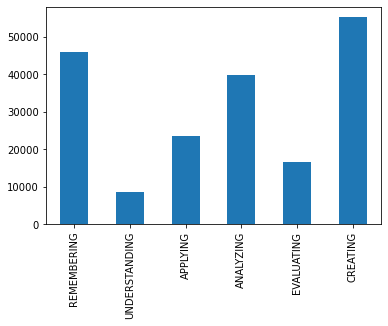

In [10]:
queries[queries.columns[1:]].sum().plot.bar()

In [11]:
queries.shape

(189799, 7)

### Approche statistique

In [12]:
import models

In [13]:
statistique = models.StatModel()

In [14]:
def unidecode_text(text):
    try:
        text = unidecode.unidecode(text)
    except:
        pass
    return text

df = queries.QUERY.apply(unidecode_text)

In [15]:
n_questions = 10
head_paraphases = statistique.generate_bloom_result(phrases=df.head(n_questions).values)
head_paraphases

,APPLYING,REMEMBERING,EVALUATING,CREATING,ANALYZING,UNDERSTANDING
0,0,0,0,0,0,0
1,0,2,1,1,0,0
2,7,1,2,2,2,2
3,0,0,0,0,0,0
4,2,0,0,1,0,1
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [16]:
for query in df.head(n_questions).values:
    print(query)

"their own language" means  _  .
"you may think the popular singer jay chow is cool". here "cool" means
. at midnight, nasreddin saw   _  in his garden.
. david beckham  is   _   years old.
. david beckham's family name is   _  and zhou jielun's given name is   _  .
. does mrs. green buy a bag of rice?
. mimi likes   _  .
. nasreddin was so frightened that he   _  .
. there isn't a   _   in my room.
. where's the supermarket?


In [17]:
import clean_text as clearner

In [18]:
clean_queries = clearner.clean_texts(queries.QUERY, show_progress=True)

unidecode
lower_text
text_tokenize
text_stemmer
text_lemmatizer
remove_URL
remove_html
remove_emoji
remove_punctuation


In [19]:
clean_queries.head()

,text,text_clean
0,"""their own language"" means _ .",their own languag mean
1,"""you may think the popular singer jay chow is ...",you may think the popular singer jay chow is c...
2,". at midnight, nasreddin saw _ in his garden.",at midnight nasreddin saw in hi garden
3,. david beckham is _ years old.,david beckham is year old
4,. david beckham's family name is _ and zhou...,david beckham famili name is and zhou jielun g...


In [20]:
n_questions = 10
head_paraphases = statistique.generate_bloom_result(phrases=clean_queries.text_clean.head(n_questions).values)
head_paraphases

,APPLYING,REMEMBERING,EVALUATING,CREATING,ANALYZING,UNDERSTANDING
0,0,0,0,0,0,0
1,0,2,1,1,0,0
2,7,1,2,2,2,2
3,0,0,0,0,0,0
4,2,0,0,1,0,1
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
categories = queries.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(clean_queries.text_clean, 
                                                    pd.Series(np.argmax(queries[categories].values, axis=1)), 
                                                    test_size=0.25, random_state=41)

In [26]:
y_train.head()

182859    5
28322     0
176082    0
41043     4
13035     3
dtype: int64

In [29]:
queries[categories].loc[y_train.index].head()

,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING
182859,0.0,0.0,0.0,0.0,0.0,1.0
28322,1.0,0.0,0.0,0.0,0.0,0.0
176082,1.0,0.0,0.0,0.0,0.0,0.0
41043,0.0,0.0,0.0,0.0,1.0,0.0
13035,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
X_test.head()

54935            can the same thing appli for inferior good
4535                                where doe the energi go
82074     at sal said over the squar of the distanc betw...
141706       is the prefix bi onli applic for systemat name
158650                are polyatom ion consid to be molecul
Name: text_clean, dtype: object

In [31]:
preds = statistique.generate_bloom_result(phrases=X_test.values)
preds.head()

,APPLYING,REMEMBERING,EVALUATING,CREATING,ANALYZING,UNDERSTANDING
0,0,0,0,0,0,0
1,1,0,0,0,0,1
2,2,2,0,1,1,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [33]:
preds_class = np.argmax(preds[categories].values, axis=1)

In [34]:
from sklearn import metrics

In [36]:
preds_class.shape

(47450,)

### Score de l'approche statistique

In [37]:
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.291     0.828     0.431     11607
UNDERSTANDING      0.118     0.115     0.116      2138
     APPLYING      0.281     0.433     0.341      5897
    ANALYZING      0.333     0.029     0.054      9836
   EVALUATING      0.149     0.045     0.069      4147
     CREATING      0.247     0.022     0.040     13825

     accuracy                          0.278     47450
    macro avg      0.237     0.245     0.175     47450
 weighted avg      0.266     0.278     0.182     47450



In [38]:
categories

Index(['REMEMBERING', 'UNDERSTANDING', 'APPLYING', 'ANALYZING', 'EVALUATING',
       'CREATING'],
      dtype='object')

In [39]:
preds.index = X_test.index
preds.head(2)

,APPLYING,REMEMBERING,EVALUATING,CREATING,ANALYZING,UNDERSTANDING
54935,0,0,0,0,0,0
4535,1,0,0,0,0,1


### Utiliser les algos de machine learning sur les sorties des données statistiques

In [40]:
X_t1, X_t2, y_t1, y_t2 = train_test_split(preds, y_test, test_size=0.15, random_state=41)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [43]:
lr = LogisticRegression(random_state=41).fit(X_t1, y_t1)

In [44]:
y_t2_pred = lr.predict(X_t2)

In [46]:
print(
    metrics.classification_report(y_t2.values, y_t2_pred, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.162     0.012     0.022      1750
UNDERSTANDING      0.000     0.000     0.000       318
     APPLYING      0.415     0.236     0.301       865
    ANALYZING      0.358     0.020     0.038      1462
   EVALUATING      0.375     0.014     0.027       635
     CREATING      0.298     0.911     0.449      2088

     accuracy                          0.304      7118
    macro avg      0.268     0.199     0.139      7118
 weighted avg      0.284     0.304     0.184      7118



In [47]:
lr = LogisticRegression(random_state=41, class_weight='balanced', max_iter=250).fit(X_t1, y_t1)

In [49]:
y_t2_pred = lr.predict(X_t2)
print(
    metrics.classification_report(y_t2.values, y_t2_pred, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.299     0.785     0.433      1750
UNDERSTANDING      0.084     0.129     0.101       318
     APPLYING      0.329     0.370     0.348       865
    ANALYZING      0.289     0.009     0.017      1462
   EVALUATING      0.147     0.169     0.157       635
     CREATING      0.352     0.048     0.084      2088

     accuracy                          0.275      7118
    macro avg      0.250     0.252     0.190      7118
 weighted avg      0.293     0.275     0.196      7118



In [52]:
svc = SVC(gamma="auto", class_weight="balanced").fit(X_t1, y_t1)

In [53]:
y_t2_pred = svc.predict(X_t2)
print(
    metrics.classification_report(y_t2.values, y_t2_pred, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.301     0.778     0.434      1750
UNDERSTANDING      0.286     0.075     0.119       318
     APPLYING      0.333     0.384     0.357       865
    ANALYZING      0.316     0.042     0.074      1462
   EVALUATING      0.173     0.306     0.221       635
     CREATING      0.439     0.041     0.075      2088

     accuracy                          0.289      7118
    macro avg      0.308     0.271     0.213      7118
 weighted avg      0.336     0.289     0.212      7118



In [54]:
xgb = XGBClassifier(verbose=1).fit(X_t1, y_t1)

[21:43:20] WARNING: /workspace/src/learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [55]:
y_t2_pred = xgb.predict(X_t2)
print(
    metrics.classification_report(y_t2.values, y_t2_pred, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.301     0.786     0.435      1750
UNDERSTANDING      0.328     0.066     0.110       318
     APPLYING      0.431     0.291     0.348       865
    ANALYZING      0.370     0.058     0.100      1462
   EVALUATING      0.287     0.039     0.069       635
     CREATING      0.332     0.251     0.286      2088

     accuracy                          0.321      7118
    macro avg      0.341     0.249     0.225      7118
 weighted avg      0.340     0.321     0.265      7118



In [56]:
dt = DecisionTreeClassifier(random_state=41, class_weight="balanced").fit(X_t1, y_t1)

In [57]:
y_t2_pred = dt.predict(X_t2)
print(
    metrics.classification_report(y_t2.values, y_t2_pred, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.301     0.760     0.431      1750
UNDERSTANDING      0.200     0.085     0.119       318
     APPLYING      0.349     0.351     0.350       865
    ANALYZING      0.285     0.056     0.094      1462
   EVALUATING      0.175     0.282     0.216       635
     CREATING      0.389     0.071     0.120      2088

     accuracy                          0.291      7118
    macro avg      0.283     0.268     0.222      7118
 weighted avg      0.314     0.291     0.228      7118



In [59]:
probs = lr.predict_proba(X_t2)
# probs += svc.predict_proba(X_t2)
probs += xgb.predict_proba(X_t2)
probs += dt.predict_proba(X_t2)

In [60]:
y_t2_pred = np.argmax(probs, axis=1)
print(
    metrics.classification_report(y_t2.values, y_t2_pred, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.301     0.759     0.432      1750
UNDERSTANDING      0.275     0.079     0.122       318
     APPLYING      0.386     0.335     0.359       865
    ANALYZING      0.308     0.044     0.078      1462
   EVALUATING      0.185     0.238     0.208       635
     CREATING      0.369     0.148     0.212      2088

     accuracy                          0.305      7118
    macro avg      0.304     0.267     0.235      7118
 weighted avg      0.321     0.305     0.252      7118



### Approche machine learning

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier

In [62]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('ovo', OneVsRestClassifier(LogisticRegression(random_state=40, class_weight="balanced"))),
])

In [64]:
import warnings

warnings.filterwarnings("ignore")

In [65]:
pipe = pipe.fit(X_train, y_train)

In [66]:
preds_class = pipe.predict(X_test)

In [67]:
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.867     0.867     0.867     11607
UNDERSTANDING      0.580     0.759     0.658      2138
     APPLYING      0.772     0.815     0.793      5897
    ANALYZING      0.862     0.856     0.859      9836
   EVALUATING      0.728     0.788     0.757      4147
     CREATING      0.901     0.818     0.857     13825

     accuracy                          0.832     47450
    macro avg      0.785     0.817     0.798     47450
 weighted avg      0.839     0.832     0.834     47450



In [68]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression(random_state=40, class_weight="balanced")),
]).fit(X_train, y_train)

In [69]:
preds_class = pipe.predict(X_test)
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.895     0.872     0.883     11607
UNDERSTANDING      0.558     0.819     0.664      2138
     APPLYING      0.786     0.814     0.799      5897
    ANALYZING      0.883     0.852     0.867      9836
   EVALUATING      0.705     0.847     0.769      4147
     CREATING      0.919     0.826     0.870     13825

     accuracy                          0.842     47450
    macro avg      0.791     0.838     0.809     47450
 weighted avg      0.854     0.842     0.846     47450



In [71]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('xgb', XGBClassifier()),
]).fit(X_train, y_train)

In [72]:
preds_class = pipe.predict(X_test)
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.840     0.865     0.852     11607
UNDERSTANDING      0.757     0.609     0.675      2138
     APPLYING      0.784     0.765     0.774      5897
    ANALYZING      0.816     0.850     0.833      9836
   EVALUATING      0.795     0.671     0.728      4147
     CREATING      0.828     0.854     0.841     13825

     accuracy                          0.818     47450
    macro avg      0.803     0.769     0.784     47450
 weighted avg      0.817     0.818     0.816     47450



In [73]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('dt', DecisionTreeClassifier(random_state=41, class_weight="balanced")),
]).fit(X_train, y_train)

In [74]:
preds_class = pipe.predict(X_test)
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.747     0.723     0.735     11607
UNDERSTANDING      0.479     0.570     0.521      2138
     APPLYING      0.581     0.605     0.592      5897
    ANALYZING      0.694     0.715     0.704      9836
   EVALUATING      0.509     0.540     0.524      4147
     CREATING      0.715     0.672     0.692     13825

     accuracy                          0.669     47450
    macro avg      0.621     0.637     0.628     47450
 weighted avg      0.673     0.669     0.670     47450



In [76]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('rfc', RandomForestClassifier(random_state=41, class_weight='balanced')),
]).fit(X_train, y_train)

In [77]:
preds_class = pipe.predict(X_test)
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.797     0.823     0.810     11607
UNDERSTANDING      0.802     0.454     0.579      2138
     APPLYING      0.776     0.585     0.667      5897
    ANALYZING      0.765     0.808     0.786      9836
   EVALUATING      0.820     0.399     0.537      4147
     CREATING      0.700     0.881     0.780     13825

     accuracy                          0.754     47450
    macro avg      0.777     0.658     0.693     47450
 weighted avg      0.762     0.754     0.744     47450



In [82]:
class Model:
    def __init__(self):
        self.xgb = XGBClassifier()
        self.lr = LogisticRegression(random_state=41, class_weight="balanced")
        self.cv = CountVectorizer()
    
    def fit(self, X_train, y_train):
        X = self.cv.fit_transform(X_train)
        self.lr.fit(X, y_train)
        self.xgb.fit(X, y_train)
        return
    
    def predict(self, X_test):
        X = self.cv.transform(X_test)
        probs = self.lr.predict_proba(X)
        probs += self.xgb.predict_proba(X)
        return np.argmax(probs, axis=1)

In [83]:
model = Model()
model.fit(X_train, y_train)

In [84]:
preds_class = model.predict(X_test)
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.892     0.886     0.889     11607
UNDERSTANDING      0.651     0.781     0.710      2138
     APPLYING      0.810     0.819     0.814      5897
    ANALYZING      0.878     0.870     0.874      9836
   EVALUATING      0.755     0.823     0.788      4147
     CREATING      0.902     0.856     0.879     13825

     accuracy                          0.856     47450
    macro avg      0.815     0.839     0.826     47450
 weighted avg      0.859     0.856     0.857     47450



In [87]:
model.cv.transform(X_test).shape

(47450, 29236)

In [88]:
TfidfTransformer?

In [90]:
pipe = Pipeline([
    ('cv', TfidfVectorizer(sublinear_tf=True)),
    ('lr', LogisticRegression(random_state=40, class_weight="balanced")),
]).fit(X_train, y_train)

In [91]:
preds_class = pipe.predict(X_test)
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.892     0.859     0.875     11607
UNDERSTANDING      0.540     0.838     0.657      2138
     APPLYING      0.773     0.823     0.797      5897
    ANALYZING      0.887     0.844     0.865      9836
   EVALUATING      0.694     0.852     0.765      4147
     CREATING      0.920     0.813     0.863     13825

     accuracy                          0.836     47450
    macro avg      0.784     0.838     0.804     47450
 weighted avg      0.851     0.836     0.840     47450



In [92]:
pipe = Pipeline([
    ('cv', TfidfVectorizer(sublinear_tf=True)),
    ('xgb', XGBClassifier()),
]).fit(X_train, y_train)

In [93]:
preds_class = pipe.predict(X_test)
print(
    metrics.classification_report(y_test.values, preds_class, target_names=categories, digits=3)
)

               precision    recall  f1-score   support

  REMEMBERING      0.848     0.856     0.852     11607
UNDERSTANDING      0.763     0.589     0.665      2138
     APPLYING      0.774     0.759     0.766      5897
    ANALYZING      0.814     0.852     0.832      9836
   EVALUATING      0.783     0.656     0.714      4147
     CREATING      0.818     0.860     0.839     13825

     accuracy                          0.815     47450
    macro avg      0.800     0.762     0.778     47450
 weighted avg      0.813     0.815     0.813     47450



### Approche deeplearning : MLP

In [121]:
import ktrain
from ktrain import text, tabular

In [122]:
X_train.apply(lambda x: len(x.split())).describe()

count    142349.000000
mean         14.258386
std           8.671093
min           1.000000
25%           8.000000
50%          12.000000
75%          18.000000
max         106.000000
Name: text_clean, dtype: float64

In [123]:
model_name = "distilbert-base-uncased"
t = text.Transformer(model_name, maxlen=50)

In [133]:
y_train = y_train.apply(lambda x: categories[x])
y_test = y_test.apply(lambda x: categories[x])

In [134]:
trn = t.preprocess_train(X_train.values, y_train.values)
vl = t.preprocess_test(X_test.values, y_test.values)

preprocessing train...
language: en
train sequence lengths:
	mean : 14
	95percentile : 31
	99percentile : 45
Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 14
	95percentile : 31
	99percentile : 46


In [135]:
# import gc

gc.collect()

12

In [136]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=vl, batch_size=64)

In [127]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  769       
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 66,954,241
Trainable params: 66,954,241
Non-trainable params: 0
_________________________________________________________________


simulating training for different learning rates... this may take a few moments...
Epoch 1/5
2224/2224 [==============================] - 684s 307ms/step - loss: 1.5096 - accuracy: 0.4101
Epoch 2/5
2224/2224 [==============================] - 725s 326ms/step - loss: 0.6689 - accuracy: 0.7586
Epoch 3/5
2224/2224 [==============================] - 724s 326ms/step - loss: 1.1615 - accuracy: 0.5384
Epoch 4/5
2224/2224 [==============================] - 722s 325ms/step - loss: 1.6941 - accuracy: 0.2873


done.
Visually inspect loss plot and select learning rate associated with falling loss


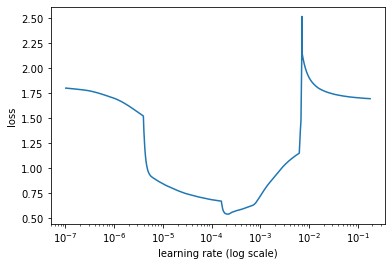

In [137]:
learner.lr_find(max_epochs=5, suggest=True, show_plot=True)

Two possible suggestions for LR from plot:
	Min numerical gradient: 3.78E-06
	Min loss divided by 10: 2.12E-05


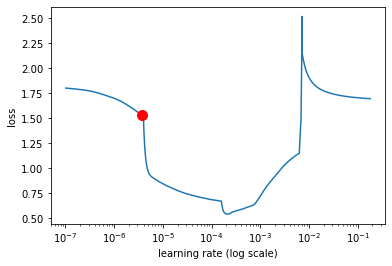

In [138]:
learner.lr_plot(suggest=True)

In [139]:
gc.collect()

118410

In [140]:
learner.fit_onecycle(3.78E-06, 5)



begin training using onecycle policy with max lr of 3.78e-06...
Epoch 1/5
2225/2225 [==============================] - 813s 365ms/step - loss: 1.3830 - accuracy: 0.4808 - val_loss: 0.9339 - val_accuracy: 0.6717
Epoch 2/5
2225/2225 [==============================] - 813s 365ms/step - loss: 0.7986 - accuracy: 0.7169 - val_loss: 0.6302 - val_accuracy: 0.7753
Epoch 3/5
2225/2225 [==============================] - 814s 366ms/step - loss: 0.6027 - accuracy: 0.7815 - val_loss: 0.5246 - val_accuracy: 0.8084
Epoch 4/5
2225/2225 [==============================] - 814s 366ms/step - loss: 0.5141 - accuracy: 0.8124 - val_loss: 0.4785 - val_accuracy: 0.8256
Epoch 5/5
2225/2225 [==============================] - 814s 366ms/step - loss: 0.4724 - accuracy: 0.8291 - val_loss: 0.4630 - val_accuracy: 0.8327


In [141]:
learner.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr', 'iterations', 'momentum'])

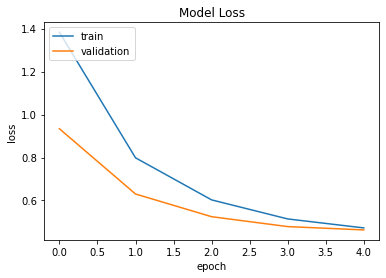

In [142]:
learner.plot()

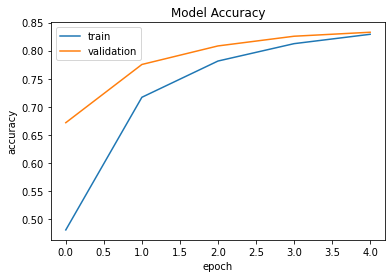

In [143]:
plt.plot(learner.history.history['accuracy'])
plt.plot(learner.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [144]:
corr = learner.validate(class_names=t.get_classes())

               precision    recall  f1-score   support

    ANALYZING       0.84      0.87      0.85      9836
     APPLYING       0.76      0.81      0.78      5897
     CREATING       0.85      0.87      0.86     13825
   EVALUATING       0.76      0.75      0.75      4147
  REMEMBERING       0.88      0.85      0.87     11607
UNDERSTANDING       0.71      0.60      0.65      2138

     accuracy                           0.83     47450
    macro avg       0.80      0.79      0.79     47450
 weighted avg       0.83      0.83      0.83     47450



In [145]:
gc.collect()

7107

In [146]:
learner.view_top_losses(n=3, preproc=t)

----------
id:19732 | loss:8.41 | true:EVALUATING | pred:REMEMBERING)

----------
id:20128 | loss:7.28 | true:UNDERSTANDING | pred:CREATING)

----------
id:45387 | loss:7.25 | true:UNDERSTANDING | pred:CREATING)



In [147]:
print(X_test.loc[X_test.index[19732]])

what is the mean of intellig design


In [148]:
print(X_test.loc[X_test.index[20128]])

whi is there a neg connot associ with small task do you think mark menial task made a big differ


In [149]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [150]:
predictor.predict("What is your english teacher name ?")

'REMEMBERING'

In [151]:
pd.DataFrame(predictor.predict_proba('What is your english teacher name ?').reshape(1, -1),
            columns=np.array(predictor.get_classes()))

,ANALYZING,APPLYING,CREATING,EVALUATING,REMEMBERING,UNDERSTANDING
0,0.011554,0.001801,0.33089,0.001908,0.604855,0.048991


In [152]:
predictor.save("./output/dl_model/") # Sauvegarder le modèle de deeplearning

In [153]:
import warnings

warnings.filterwarnings("ignore")

In [154]:
predictor.explain("What is your english teacher name ?")